<a href="https://colab.research.google.com/github/SamaSamrin/2024/blob/main/Isolation_Forest_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/mydrive/')

Mounted at /content/mydrive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option("display.float", "{:.2f}".format)
#%matplotlib inline
#sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("/content/mydrive/MyDrive/0_code_drive/creditcard.csv")
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The dataset has 31 columns consisting of 30 potential features and 1 label column “Class” (anomalies=1). We also confirm that the class contains a very low number of anomalies (492).

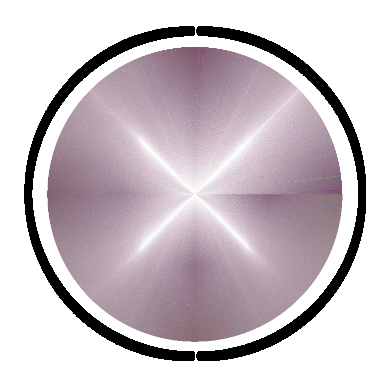

In [8]:
palette_color = sns.color_palette('bright')
plt.pie(df['Time'], labels=df['Class'], colors=palette_color)
plt.show()

**Time feature exploration**

In [ ]:
sns.set_style("whitegrid")

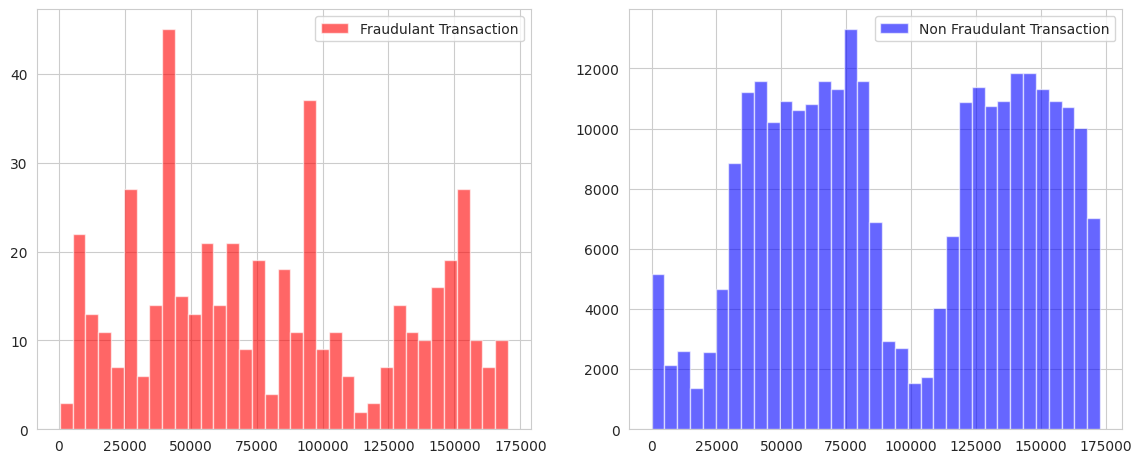

In [ ]:
plt.figure(figsize=(14, 12))
plt.subplot(2, 2, 1)
df[df.Class == 1].Time.hist(bins=35, color='red', alpha=0.6, label="Fraudulant Transaction")

plt.legend()
plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

The dataset contains a time column (in seconds) which could potentially influence how we approach the problem. There appears to be no visual relationship in the time distributions between fraudulent and non-fraudulent transactions.

## IF model - 2

In [ ]:
X = df.drop('Class', axis=1)
y = df.Class

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
Iforest = IsolationForest(max_samples=100,
                          random_state=42,
                         contamination=0.1,
                         max_features=1.0,
                         n_estimators=100,
                         verbose=1,
                         n_jobs=-1)
Iforest.fit(X)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.4s finished
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, max_samples=100, n_jobs=-1, random_state=42,
                verbose=1)

In [ ]:
y_pred = Iforest.predict(X)
y_pred_adjusted = [1 if x == -1 else 0 for x in y_pred]
sum(y_pred_adjusted)

28481

The algorithm identified 28481 data points as abnormal (approx 10%) which corresponds exactly with the contamination input parameter initially specified.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y, y_pred_adjusted, average='macro')

(0.5074864711161692, 0.8907150784176889, 0.48895080475704383, None)

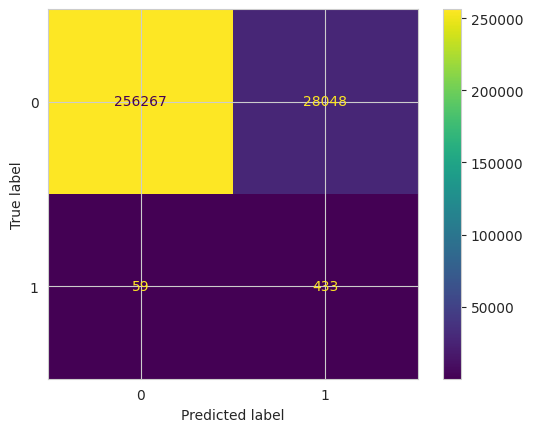

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred_adjusted)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

## Building IF Model

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# selecting variables or features, whose anomalies we want to find
selected_columns_list = ['NPHI', 'RHOB']

In [ ]:
model_if = IsolationForest(contamination=0.1, random_state=42)

In [ ]:
# run/train the model
model_if.fit(df[selected_columns_list])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13290 entries, 4371 to 17707
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WELL       13290 non-null  object 
 1   DEPTH_MD   13290 non-null  float64
 2   GROUP      13290 non-null  object 
 3   FORMATION  13290 non-null  object 
 4   CALI       13290 non-null  float64
 5   RDEP       13290 non-null  float64
 6   RHOB       13290 non-null  float64
 7   GR         13290 non-null  float64
 8   NPHI       13290 non-null  float64
 9   PEF        13290 non-null  float64
 10  DTC        13290 non-null  float64
 11  LITH       13290 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.3+ MB


## Creating predictions

In [ ]:
# Adding anomaly score as a column to our dataframe
df['anomaly_score'] = model_if.decision_function(df[selected_columns_list])

In [ ]:
# Adding anomaly column to tell us if the score is an anomaly or not
df['anomaly'] = model_if.predict(df[selected_columns_list])

In [ ]:
df.loc[:, ['NPHI', 'RHOB', 'anomaly_score', 'anomaly']]

,NPHI,RHOB,anomaly_score,anomaly
4371,0.541850,2.063168,0.094522,1
4372,0.545401,2.051136,0.095207,1
4373,0.548953,2.041540,0.099837,1
4374,0.549356,2.035698,0.105620,1
4375,0.543351,2.029099,0.117897,1
...,...,...,...,...
17703,0.257656,2.391858,0.108037,1
17704,0.264047,2.408428,0.088239,1
17705,0.269605,2.432385,0.075509,1
17706,0.270624,2.452091,0.058709,1


In [ ]:
anomaly_df = df[df['anomaly'] < 1]

In [ ]:
display(anomaly_df)

,WELL,DEPTH_MD,GROUP,FORMATION,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,LITH,anomaly_score,anomaly
4388,15/9-15,1152.232,HORDALAND GP.,Utsira Fm.,17.303955,1.554278,2.017085,56.147446,0.610448,2.349493,136.660767,Sandstone/Shale,-0.023314,-1
4389,15/9-15,1152.384,HORDALAND GP.,Utsira Fm.,17.368221,1.536840,2.027622,60.812626,0.614587,2.479241,136.615814,Sandstone/Shale,-0.030310,-1
4390,15/9-15,1152.536,HORDALAND GP.,Utsira Fm.,17.433296,1.526943,2.033576,63.832851,0.600994,2.595812,134.936020,Sandstone/Shale,-0.021504,-1
4396,15/9-15,1153.448,HORDALAND GP.,Utsira Fm.,17.531738,1.550310,2.052402,63.161396,0.595614,2.426642,135.800201,Shale,-0.014432,-1
4397,15/9-15,1153.600,HORDALAND GP.,Utsira Fm.,17.628222,1.554753,2.053053,63.979164,0.602664,2.441010,133.874008,Shale,-0.024152,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17007,15/9-15,3092.360,HEGRE GP.,Skagerrak Fm.,7.771852,1.391111,2.546857,85.536346,0.253671,4.675657,84.364174,Shale,-0.029337,-1
17008,15/9-15,3092.512,HEGRE GP.,Skagerrak Fm.,7.766542,1.425502,2.555655,83.018211,0.242080,4.761117,84.138779,Shale,-0.030460,-1
17009,15/9-15,3092.664,HEGRE GP.,Skagerrak Fm.,7.766000,1.359458,2.556663,80.335114,0.245645,4.691048,82.780182,Shale,-0.030456,-1
17010,15/9-15,3092.816,HEGRE GP.,Skagerrak Fm.,7.766017,1.231052,2.548614,78.555679,0.250097,4.690549,81.486710,Shale,-0.026650,-1


In [ ]:
df = df.dropna()

In [ ]:
anomaly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 4388 to 17011
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WELL           1329 non-null   object 
 1   DEPTH_MD       1329 non-null   float64
 2   GROUP          1329 non-null   object 
 3   FORMATION      1329 non-null   object 
 4   CALI           1329 non-null   float64
 5   RDEP           1329 non-null   float64
 6   RHOB           1329 non-null   float64
 7   GR             1329 non-null   float64
 8   NPHI           1329 non-null   float64
 9   PEF            1329 non-null   float64
 10  DTC            1329 non-null   float64
 11  LITH           1329 non-null   object 
 12  anomaly_score  1329 non-null   float64
 13  anomaly        1329 non-null   int64  
dtypes: float64(9), int64(1), object(4)
memory usage: 188.0+ KB


In [ ]:
df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,anomaly_score,anomaly
count,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000
mean,2169.492778,12.833851,1.510445,2.175036,58.696609,0.385804,4.239308,117.639977,0.069161,0.800000
std,593.742839,3.670514,1.533181,0.235817,32.090900,0.151834,6.891200,36.005515,0.053960,0.600023
min,1149.648000,7.325138,0.264479,1.438999,6.024419,0.039013,1.525528,7.415132,-0.153260,-1.000000
25%,1654.630000,9.270689,0.708259,1.985819,42.678802,0.250505,2.404613,83.249586,0.038139,1.000000
50%,2159.612000,13.014988,0.910295,2.104366,60.153360,0.452551,3.191989,122.774113,0.071367,1.000000
75%,2690.130000,14.929195,1.467155,2.382383,75.884712,0.511027,4.889488,149.933315,0.112765,1.000000
max,3198.760000,25.717396,14.046203,2.648847,804.298950,0.733152,288.103638,205.208664,0.154760,1.000000


In [ ]:
anomaly_df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,anomaly_score,anomaly
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.0
mean,2194.891497,13.093433,2.999142,2.207107,41.831285,0.336419,4.599136,106.492504,-0.038207,-1.0
std,493.511105,3.570821,3.029503,0.351914,39.876582,0.211909,8.897702,41.204419,0.031396,0.0
min,1152.232000,7.480472,0.264479,1.438999,6.093219,0.039013,1.525528,7.613826,-0.153260,-1.0
25%,1839.272000,10.127096,0.740385,1.851881,13.526032,0.104261,2.824958,63.614796,-0.054591,-1.0
50%,2250.584000,12.586131,1.365619,2.203623,40.339241,0.347437,3.714228,102.566437,-0.030461,-1.0
75%,2595.016000,16.262522,5.110446,2.576642,60.117359,0.547961,5.511979,150.155838,-0.013182,-1.0
max,3092.968000,22.759352,14.046203,2.648847,792.756836,0.733152,232.342529,193.261139,-0.000006,-1.0


## Visualizations

In [ ]:
import seaborn as sns

In [ ]:
def outlier_plot(data, outlier_method_name, x_var, y_var,
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):

    print(f'Outlier Method: {outlier_method_name}')

    method = f'{outlier_method_name}_anomaly'

    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')

    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 1329
Number of non anomalous values  11961
Total Number of Values: 13290


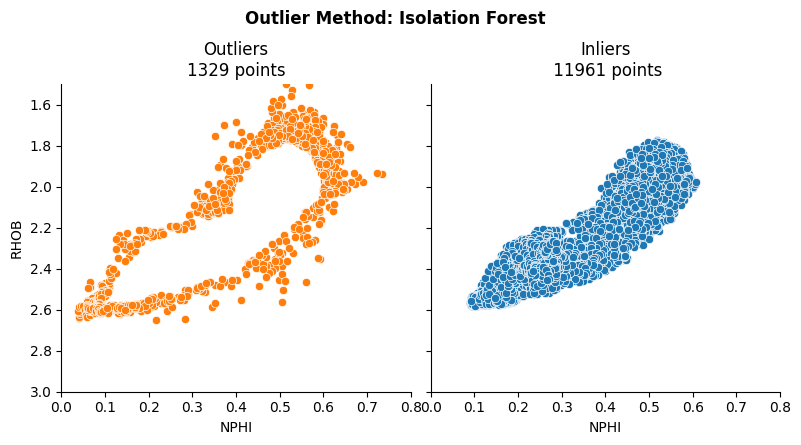

In [ ]:
outlier_plot(df, "Isolation Forest", "NPHI", "RHOB", [0, 0.8], [3, 1.5])

# Project Code

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np

# Load data from CSV file
data = pd.read_csv('/content/mydrive/MyDrive/0_code_drive/knn_2.csv')

# Train the Isolation Forest model
clf = IsolationForest(random_state=42)
clf.fit(data)

# Make predictions
pred = clf.predict(data)

# Convert predictions to binary (1 for inliers, -1 for outliers)
pred_binary = np.where(pred == 1, 0, 1)

# Add predictions to the DataFrame
data['anomaly'] = pred_binary

# Save the DataFrame with predictions to a new CSV file
data.to_csv('predictions.csv', index=False)

# Split data into train and test sets for evaluation
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# Train the Isolation Forest model on training set
clf = IsolationForest(random_state=42)
clf.fit(X_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Convert predictions to binary (1 for inliers, -1 for outliers)
y_pred_binary = np.where(y_pred == 1, 0, 1)

# Assuming you have ground truth labels in 'ground_truth' column
y_test = X_test['ground_truth']

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_binary)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"AUC: {auc}")
print(f"Accuracy: {accuracy}")

KeyError: 'ground_truth'